In [159]:
!pip install -Uqq Fastbook

In [160]:
from fastai.imports import *

In [161]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [162]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [164]:
modes = train_df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [165]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [166]:
def proc_data(df):
    df.Fare.fillna(0, inplace = True)
    df.fillna(modes, inplace = True)
    df['LogFare'] = np.log1p(df.Fare)
    df['Embarked'] = pd.Categorical(df.Embarked) 
    df['Sex'] = pd.Categorical(df.Sex)
    
proc_data(train_df)
proc_data(test_df)

In [167]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,2.202765


In [168]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
LogFare        0
dtype: int64

In [169]:
train_df.Embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: category
Categories (3, object): ['C', 'Q', 'S']

In [170]:
train_df.Embarked.cat.codes

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int8

In [171]:
train_df.Sex.cat.codes

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int8

In [172]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'LogFare'],
      dtype='object')

In [173]:
cats = ['Embarked', 'Sex']
conts = ['Pclass', 'Age', 'SibSp', 'Parch', 'LogFare']
dep = 'Survived'

In [174]:
from sklearn.model_selection import train_test_split

random.seed(42)
train_df, val_df = train_test_split(train_df, test_size = 0.25)
train_df[cats] = train_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)

In [175]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare
454,455,0,3,"Peduzzi, Mr. Joseph",1,24.0,0,0,A/5 2817,8.050,B96 B98,2,2.202765
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",0,54.0,1,0,PC 17603,59.400,B96 B98,0,4.100989
734,735,0,2,"Troupiansky, Mr. Moses Aaron",1,23.0,0,0,233639,13.000,B96 B98,2,2.639057
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",0,15.0,0,0,2667,7.225,B96 B98,0,2.107178
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",0,24.0,1,0,376564,16.100,B96 B98,2,2.839078


In [176]:
dep in train_df

True

In [177]:
def xs_y(df):
    return df[cats + conts].copy(), df[dep] if dep in df else None

x_train, y_train = xs_y(train_df)
x_val, y_val = xs_y(val_df)

In [178]:
len(x_train), len(x_val)

(668, 223)

In [179]:
preds = x_val.Sex == 0

In [180]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_val, preds)

0.17040358744394618

In [181]:
preds = x_val.LogFare > 2.7
mean_absolute_error(y_val, preds)

0.33183856502242154

In [182]:
temp = val_df.Sex <= 0.5
temp

537     True
652    False
771    False
519    False
481    False
       ...  
399     True
759     True
764    False
462    False
339    False
Name: Sex, Length: 223, dtype: bool

In [183]:
def _side_score(side, y):
    tot = side.sum()
    if tot<=1: return 0
    return y[side].std()*tot
    
def score(col, y, split):
    lhs = col <= split
    return (_side_score(lhs, y) + _side_score(~lhs, y)) / len(y)

In [184]:
score(x_train['Sex'], y_train, 0.5)

0.4185091349374004

In [185]:
score(x_train['LogFare'], y_train, 2.7)

0.4776531460221565

In [186]:
nm = 'Age'
col = x_train[nm]
unq = col.unique()
unq.sort()
unq

array([ 0.42,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,  5.  ,
        6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  , 14.  ,
       14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 , 21.  ,
       22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  , 28.  ,
       28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  , 34.  ,
       34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  , 40.5 ,
       41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  , 48.  ,
       49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 , 56.  ,
       57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  , 65.  ,
       66.  , 70.5 , 71.  , 74.  ])

In [187]:
scores = [score(col, y_train, i) for i in unq if not np.isnan(i)]
unq[np.argmin(scores)]

6.0

In [188]:
dep

'Survived'

In [189]:
def min_col(df, nm):
    col, y = df[nm], df[dep]
    unq = col.dropna().unique()
    scores = np.array([score(col, y_train, i) for i in unq])
    idx = scores.argmin()
    return unq[idx], scores[idx]

min_col(train_df, 'Age')

(6.0, 0.4849789118181996)

In [190]:
cols = conts + cats
{i: min_col(train_df, i) for i in cols}

{'Pclass': (2, 0.4654578458908492),
 'Age': (6.0, 0.4849789118181996),
 'SibSp': (4, 0.4852937563781006),
 'Parch': (0, 0.4867130567996763),
 'LogFare': (3.9318256327243257, 0.4690953908552649),
 'Embarked': (0, 0.47929042025264745),
 'Sex': (0, 0.4185091349374004)}

In [191]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

model = DecisionTreeClassifier(max_leaf_nodes = 4).fit(x_train, y_train)

In [192]:
import graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

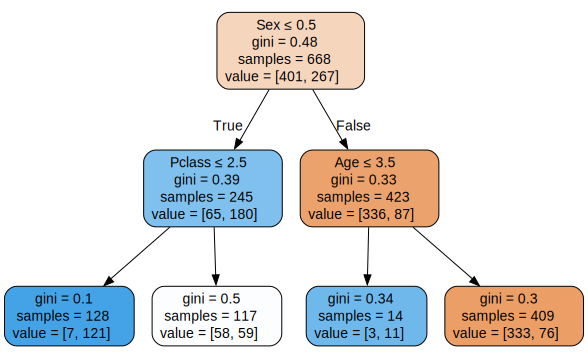

In [193]:
draw_tree(model, x_train)

In [194]:
model.predict(x_val)

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0])

In [195]:
mean_absolute_error(y_val, model.predict(x_val))

0.17040358744394618

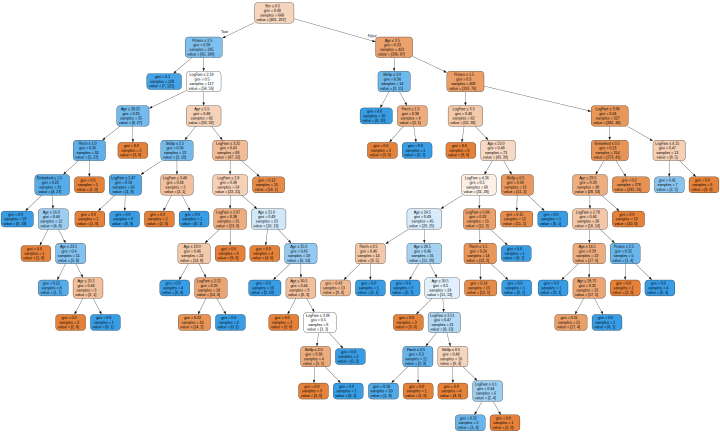

In [196]:
model = DecisionTreeClassifier(max_leaf_nodes=50)
model.fit(x_train, y_train)
draw_tree(model, x_train)

In [197]:
mean_absolute_error(y_train, model.predict(x_train))

0.08383233532934131

In [209]:
n = len(x_train)
random.choice([n, 10])

10

In [210]:
idxs = np.random.choice(n, int(n*0.75))
idxs

array([582, 543, 246,  81, 347,  56, 455,  61, 121, 371, 293,  67,  15,
       125,  73,  40, 527, 269, 299, 188, 368, 424, 531, 463,  54, 388,
       103, 298, 461,  18, 603, 350, 146, 470, 234,   5, 413, 269, 123,
        70, 289, 627, 511, 573, 306, 291,  34, 521, 541, 640,  21, 585,
        30, 610, 519, 333, 479, 262, 403, 119, 369, 648, 220, 285, 184,
       337, 577, 574, 328, 180,  55,  43, 355, 162, 108, 551, 490, 502,
       138, 661, 115, 101, 463,  80, 657, 648, 382, 646, 661, 379, 631,
       256, 554, 120, 505, 188, 657, 592, 463, 521, 188, 590, 575, 572,
       350, 193, 134, 664, 244, 216, 119, 492, 665, 566,  63, 382, 114,
       358, 481, 192, 377, 511, 328, 338, 373, 332, 112,  84, 555, 447,
       327, 578, 575, 626, 315, 348, 176, 556, 444, 279, 182, 340, 638,
       582,  79, 422, 566, 416,  19,   0, 484, 369, 524, 293,  96, 410,
       189, 244, 533, 345, 661, 200, 642,  39, 103, 505, 103, 513, 285,
       540, 297, 196,  29, 336,   3, 515, 521, 370,  14, 389, 11

In [207]:
len(x_train)

668

In [208]:
len(idxs)

501

In [212]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(100, min_samples_leaf=5)
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=5)

In [213]:
mean_absolute_error(y_val, model.predict(x_val))

0.13901345291479822

In [214]:
model.feature_importances_

array([0.05435365, 0.40158648, 0.1409071 , 0.14547406, 0.03202708,
       0.03248044, 0.19317119])

In [215]:
model.feature_names_in_

array(['Embarked', 'Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'LogFare'],
      dtype=object)

<Axes: ylabel='cols'>

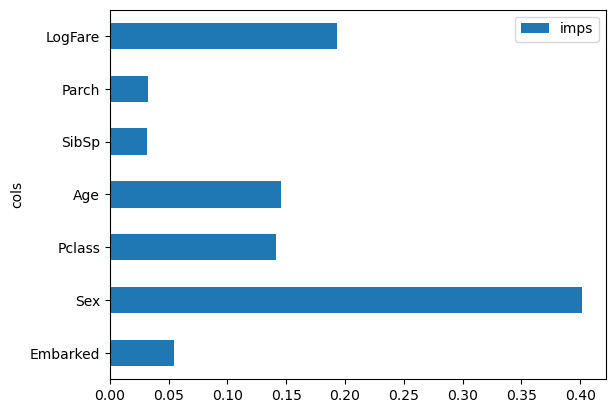

In [224]:
pd.DataFrame(dict(cols = model.feature_names_in_, imps = model.feature_importances_)).plot('cols', 'imps', 'barh')